### Question to Answer
- Is there a conflict of interest for a website that both sells movie tickets and displays review ratings?
#### - More Specifically
- Does a website like Fandango artificially display higher review ratings to sell more movie tickets?
<br><br>

#### Fandango has two ratings
- STARS: Rating in stars 0-5 displayed on their website's HTML
- RATING: Actual true rating numerically shown on movie's page.
<br><br>

- First we will compare these ratings to check for discrepancies.
<img src="./assets/1/1-fandango_rating_1.png" width="600" />

- Then we'll compare Fandango's ratings to other rating website scores
<img src="./assets/1/1-fandango_rating_2.png" width="600" />

#### TASK: Import any libraries you think you will use:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango rating to see if our analysis agrees with the article's conclusion.

### Task: Load fandango_scrape.scv file

In [2]:
fandango = pd.read_csv('./fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


#### TASK: Explore the DataFrame Properties and Head.

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
FILM      504 non-null object
STARS     504 non-null float64
RATING    504 non-null float64
VOTES     504 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


#### TASK: Let's explore the relationship between popularity of a film and it's its rating. 
#### Create a Scatterplot showing the relationship between rating and votes.

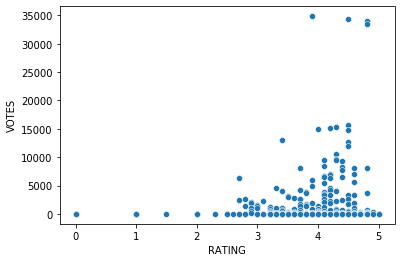

In [7]:
sns.scatterplot(y='VOTES',x='RATING',data=fandango)

#### TASK: Calculate the correlation between the columns:

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### TASK: Assuming that every row in the FILM title column has the same format:
	Film Title Name (Year)
#### Create a new column that is able to strip the year from the title strings and set this new column as YEAR

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', '') )

In [10]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


#### TASK: How many movies are in the Fandango DataFrame per year ?

In [11]:
fandango['YEAR'].value_counts()

2015    478
2014     23
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

#### TASK: Visualize the count of movies per year with a plot:

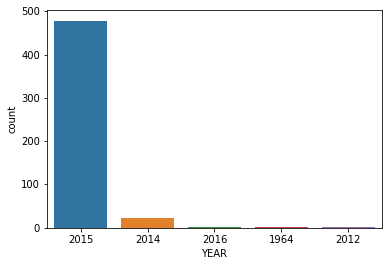

In [12]:
sns.countplot(x='YEAR', data=fandango)

#### TASK: What are the 10 movies with the highest number of votes ?

In [13]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


#### TASK: How many movies have zero votes ?

In [14]:
no_votes = fandango['VOTES'] == 0

In [15]:
no_votes.count()

504

#### TASK: Create DataFrame of only review films by removing any films that have zero votes.

In [16]:
fan_reviewed = fandango[fandango['VOTES']>0]

In [17]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


#### As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. <br> Let's visualize this difference in distributions.

#### TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what <br> the true rating was from votes (RATING). <br> Clip the KDEs to 0-5.

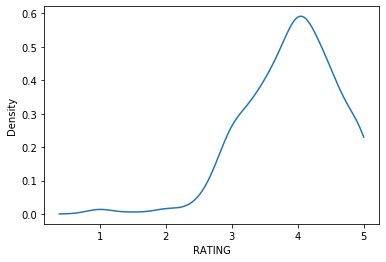

In [18]:
sns.kdeplot(x='RATING', data=fan_reviewed, clip=[0, 5])

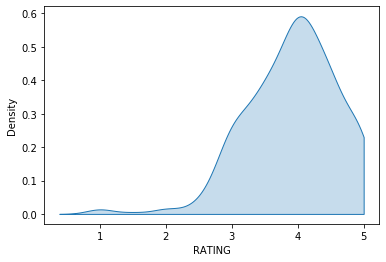

In [19]:
sns.kdeplot(x='RATING', data=fan_reviewed, clip=[0, 5], fill=True, label='True Rating')

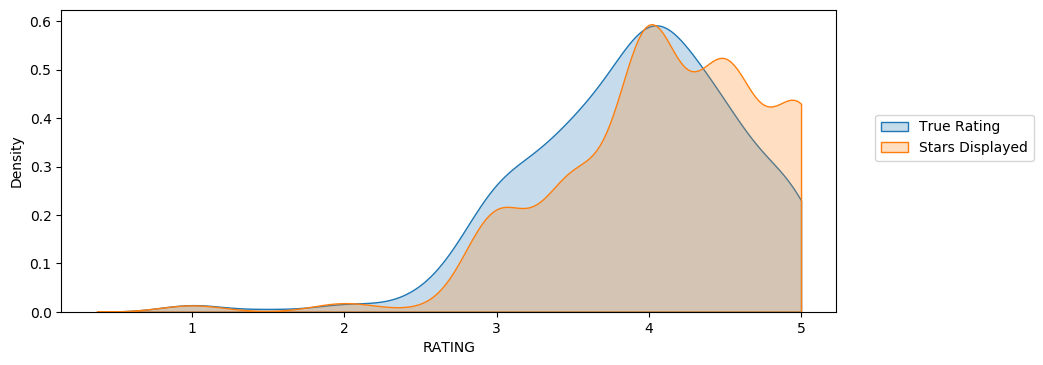

In [20]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(x='RATING', data=fan_reviewed, clip=[0, 5], fill=True, label='True Rating')
sns.kdeplot(x='STARS', data=fan_reviewed, clip=[0, 5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05, 0.5))

#### TASK: Let's now actually quantify this discrepancy.<br>Create a new column of the different between STARS displayed versus true RATING.<br> Calculate this difference with STARS-RATING and round these differences to the nearest to the nearest decimal point.

In [21]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


#### TASK: Create a count plot to display the number of times a certain difference occurs:

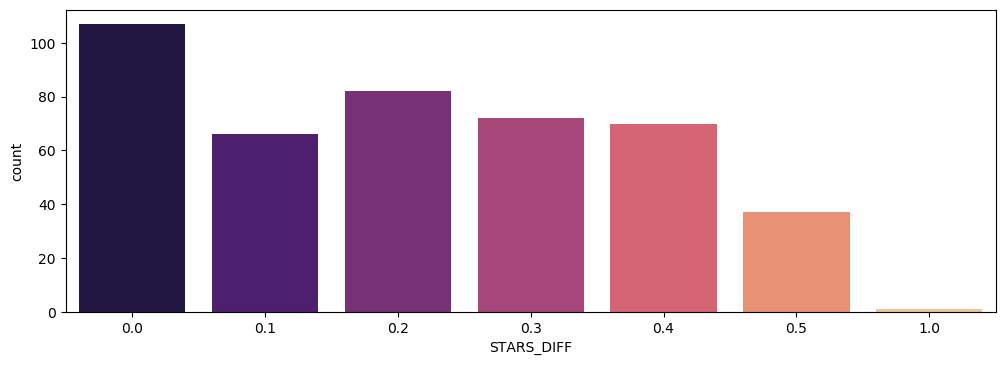

In [24]:
plt.figure(figsize=(12, 4), dpi=100)
sns.countplot(x='STARS_DIFF', data=fan_reviewed, palette='magma')

In [25]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Part Three: Comparison of Fandango Ratings to Other Sites
- Let's now compare the scores from Fandango to other movies sites and see how they compare.

#### TASK: Read in the "all_sites_scores.csv" file by running the cell below

In [26]:
all_sites = pd.read_csv('./all_sites_scores.csv')

#### TASK: Explore the DataFrame columns, info, description.

In [27]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [28]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Metacritic_user_vote_count    146 non-null int64
IMDB_user_vote_count          146 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [29]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomates
- Let's first take a look at Rotten Tomates. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

#### TASK: Create a Scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

(0, 100)

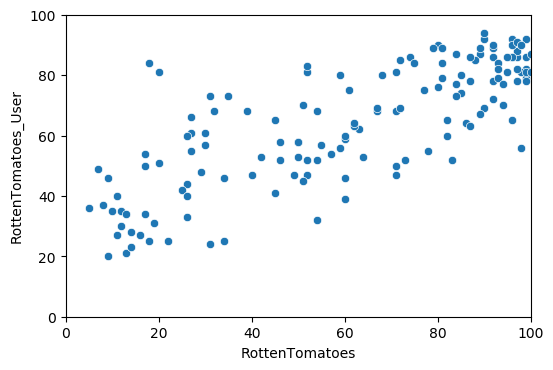

In [30]:
plt.figure(dpi=100)
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites)
plt.xlim(0, 100)
plt.ylim(0, 100)

- Let's quantify this difference by comparing the critics ratings and the "RT User ratings". We will calculate this with Rotten Tomatoes-RottenTomatoes_User. Note:
Rotten_Diff here is critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users.
Larger negative values means users rated much higher than critics.

#### TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User

In [31]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [32]:
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

- Let's now compare the overall mean difference. Since we're dealing with differences that could be negative, first take the absolute value of all the differences, then take the mean.
- This would report back on average to absolute difference between the critics rating versus the user rating.

#### TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.

In [33]:
all_sites['Rotten_Diff'].apply(abs)

0      12
1       5
2      10
3      66
4      14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

In [34]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

#### TASK: Plot the distribution of the differences between RT Critics Score and RT User Score.
#### There should be negative values in this distribution plot.
#### Feel free to use KDE or Histograms to display this distribution.

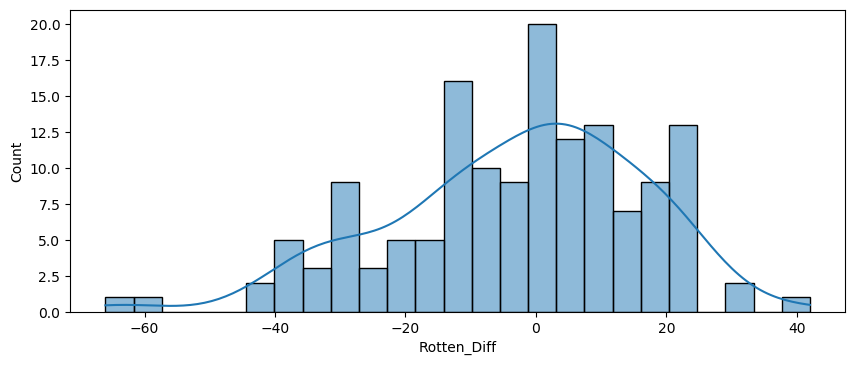

In [35]:
plt.figure(figsize=(10, 4), dpi=100)
sns.histplot(x='Rotten_Diff', data=all_sites, kde=True, bins=25)

#### TASK: Now create a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

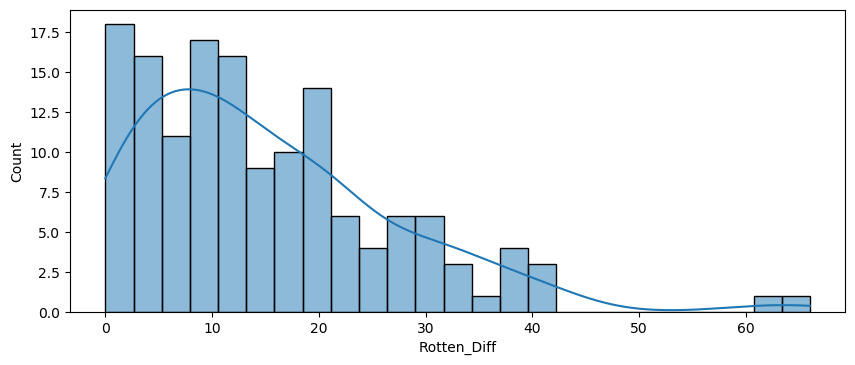

In [36]:
plt.figure(figsize=(10, 4), dpi=100)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

##### Let's find out which movies are causing the largest differences. <br>First, show the top 5 movies with the largest negative difference between Users and RT critics.<br>Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.

#### TASK: What are the top 5 movies users rated higher than critics on average:

In [37]:
all_sites.nsmallest(5, 'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [38]:
all_sites.nsmallest(5, 'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

#### TASK: Now show the top 5 movies critics scores higher than users on average:

In [39]:
all_sites.nlargest(5, 'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

## MetaCritic
- Let's take a quick look at the ratings from MetaCritic. MetaCritic also shows an average user rating versus their official displayed rating

#### TASK: Display a Scatterplot of the MetaCritic Rating Versus  the MetaCritic User Rating.

In [40]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

(0, 10)

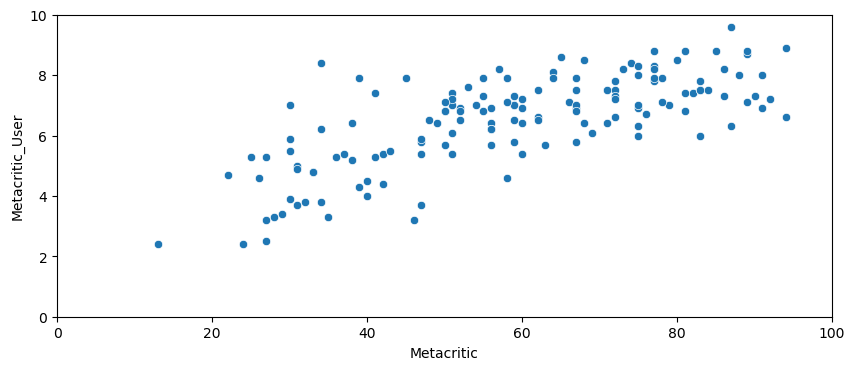

In [41]:
plt.figure(figsize=(10, 4), dpi=100)
sns.scatterplot(x='Metacritic',y='Metacritic_User', data=all_sites)
plt.xlim(0, 100)
plt.ylim(0, 10)

## IMDB
- Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts.
- Let's analyze the most popular movies.

#### TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

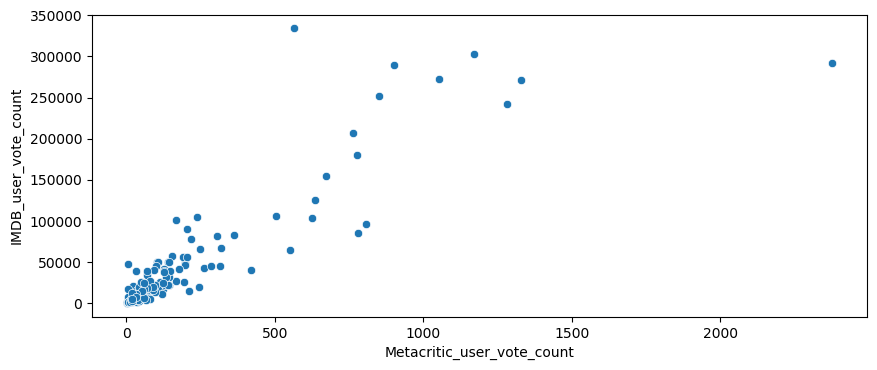

In [42]:
plt.figure(figsize=(10, 4), dpi=100)
sns.scatterplot(x='Metacritic_user_vote_count',y='IMDB_user_vote_count', data=all_sites)

##### Notice there are two outliers here.
##### The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.
##### What is this movie ?

#### TASK: What movie has the highest IMDB user vote count ?

In [43]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


#### TASK: What movie has the highest Metactir user vote count ?

In [44]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Scores vs. All Sites
- Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

#### TASK: Combine the Fandango Table with the All Sites table.<br> Not every movie in the Fandango Table is in the All Sites table, since some Fandango movies have very little or no reviews.<br> We only want to compare movies that are in both DataFrames, so do an inner merge to merge together both DataFrames based on the FILM Columns.

In [45]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

In [46]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
FILM                          145 non-null object
STARS                         145 non-null float64
RATING                        145 non-null float64
VOTES                         145 non-null int64
YEAR                          145 non-null object
RottenTomatoes                145 non-null int64
RottenTomatoes_User           145 non-null int64
Metacritic                    145 non-null int64
Metacritic_User               145 non-null float64
IMDB                          145 non-null float64
Metacritic_user_vote_count    145 non-null int64
IMDB_user_vote_count          145 non-null int64
Rotten_Diff                   145 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 15.9+ KB


### Normalize Columns to Fandango STARS and RATINGS 0-5
- Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does.
- In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

#### TASK: Create new normized columns for all ratings so they match up within the 0-5 star range shown on Fandango.
#### There are many ways to do this.

- Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

Easier Hint:
Keep in mind, a simple way to convert ratings:

- 100/20 = 5
- 10/2 = 5

In [48]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


In [49]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [50]:
# np.round(, 1) :
# to round numbers like 4.45678 to 4.4

In [51]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

In [52]:
df['MT_Norm'] = np.round(df['Metacritic']/20, 1)
df['MTU_Norm'] = np.round(df['Metacritic_User']/2, 1)

In [53]:
df['IMDB_Norm'] = np.round(df['IMDB']/20, 1)

In [54]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,0.2
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,0.4
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,0.4
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,0.4
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,0.4


#### TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings.<br>Include both STARS and RATING from the original Fandango table.

In [55]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'MT_Norm', 'MTU_Norm', 'IMDB_Norm'],
      dtype='object')

In [56]:
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'MT_Norm', 'MTU_Norm', 'IMDB_Norm']]

In [57]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,0.2
1,4.5,4.5,3.6,4.0,3.0,3.5,0.4
2,5.0,4.8,3.6,4.2,3.6,3.3,0.4
3,5.0,4.8,4.0,4.2,3.4,3.4,0.4
4,4.5,4.5,4.9,4.5,4.7,4.4,0.4
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,0.3
141,4.0,3.6,4.8,4.0,4.4,3.2,0.4
142,4.5,4.2,4.6,4.2,3.4,3.5,0.4
143,4.0,3.9,4.8,4.3,4.3,3.6,0.4


### Comparing Distribution of Scores Across Sites
- Now the moment of truth! Does Fandango display abnormally high ratings ? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average ?

#### TASK: Create a plot comparing the distribution of normalized ratings across all Sites<br>There are many ways to do this, but explore the Seaborn KDEPlot docs for simple ways to quickly show this.<br>Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.

- Quick Note if you have issues moving the legend for a seaborn kdeplot:
https://github.com/mwaskom/seaborn/issues/2280

In [58]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

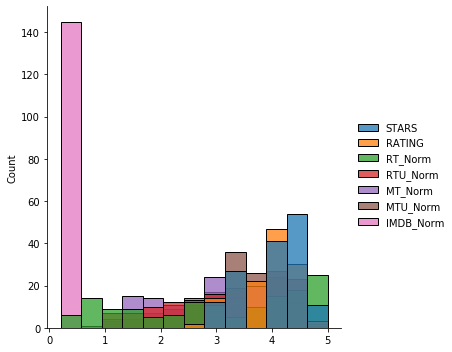

In [59]:
sns.displot(data=norm_scores)

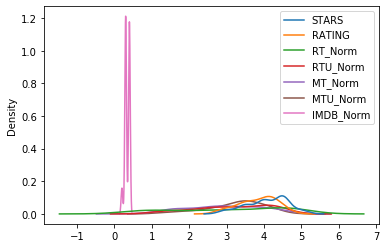

In [60]:
sns.kdeplot(data=norm_scores)

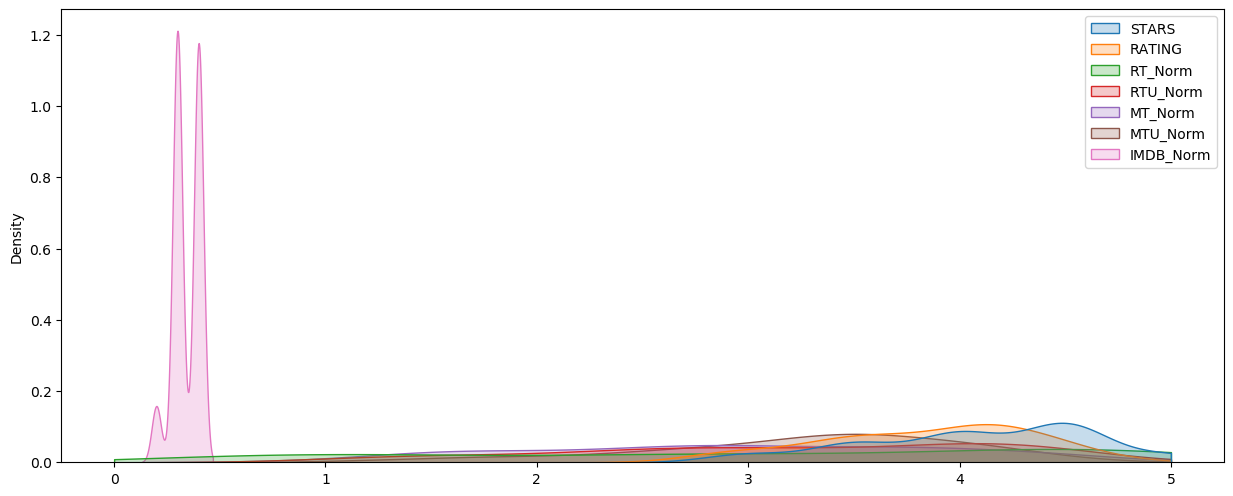

In [61]:
plt.figure(figsize=(15, 6), dpi=100)
sns.kdeplot(data=norm_scores, clip=[0, 5], shade=True)

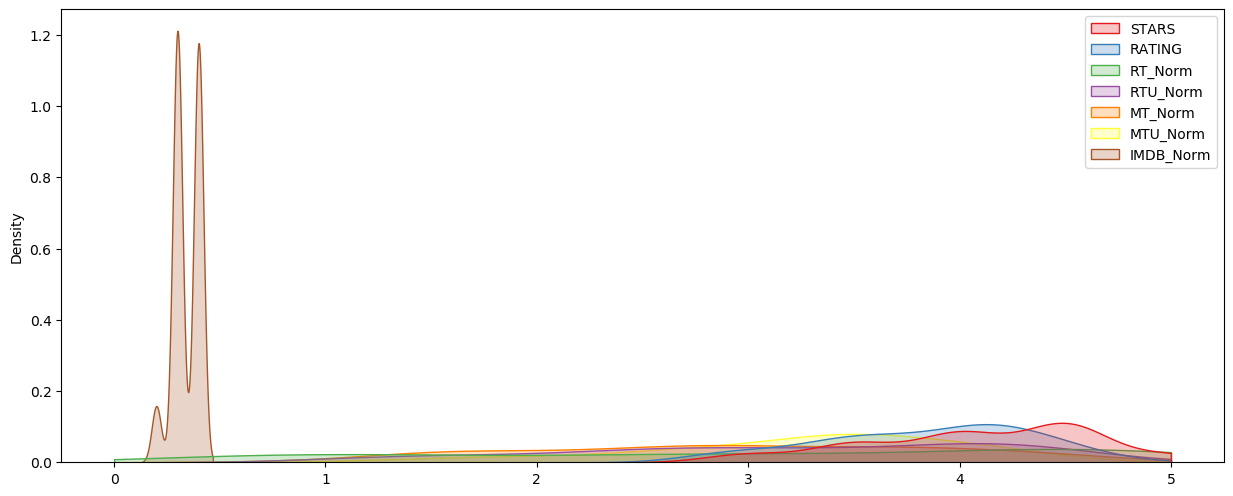

In [62]:
plt.figure(figsize=(15, 6), dpi=100)
sns.kdeplot(data=norm_scores, clip=[0, 5], shade=True, palette='Set1')

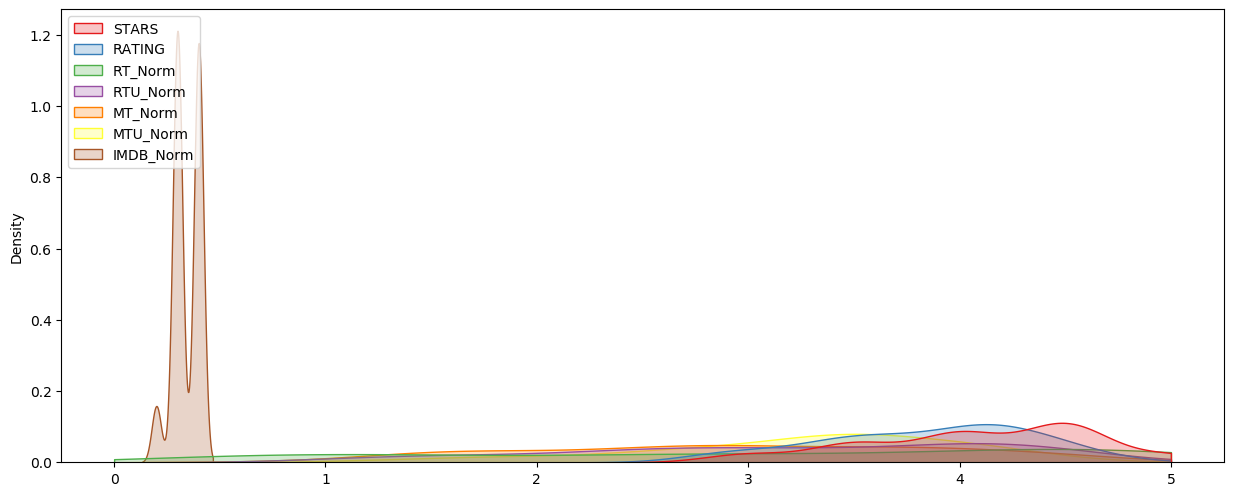

In [63]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=100)
sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, palette='Set1')
move_legend(ax, 'upper left')

### Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution.Let's directly compare these two.

#### TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

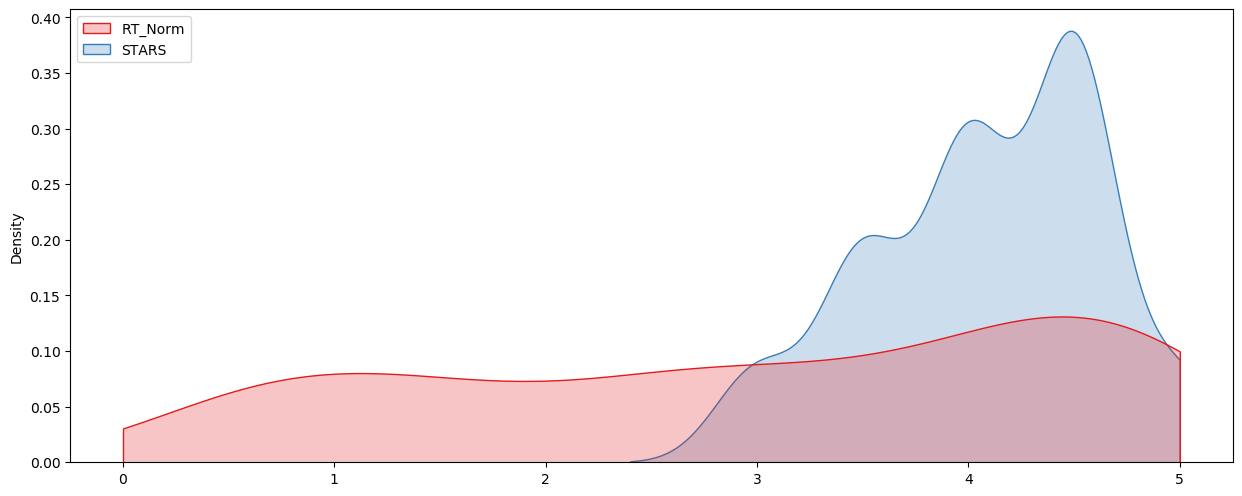

In [68]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=100)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1')
move_legend(ax, 'upper left')

#### TASK: Create a histplot comparing all normalized scores.

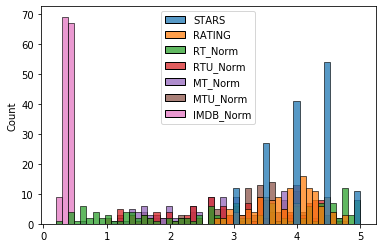

In [69]:
sns.histplot(data=norm_scores, bins=50)

### How are the worst movies rated across all platforms ?

#### TASK: Create a clustermap visualization of all normalized scores. Note the difference in ratings, highly rated movies should be clustered together versus poorly rated movies.
#### Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.

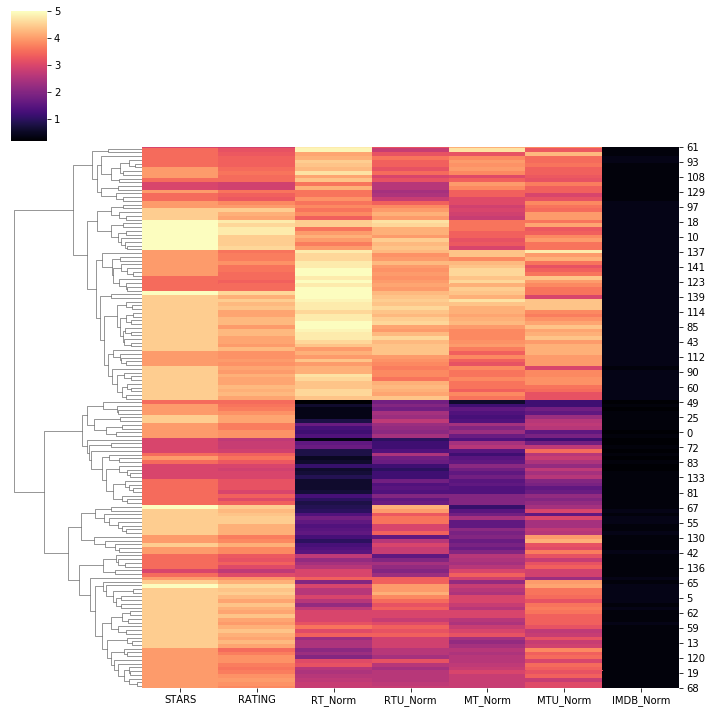

In [70]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

#### TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.
#### Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies ? 
#### What are the normalized scores across all platforms for these movies ? You may need  to add the FILM column back into your DataFrame of normalized scores to see the results.

In [71]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'MT_Norm', 'MTU_Norm',
       'IMDB_Norm'],
      dtype='object')

In [76]:
norm_films = df[['FILM', *norm_scores.columns.values]]

In [77]:
norm_films

,FILM,STARS,RATING,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,0.2
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,0.4
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,0.4
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,0.4
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,0.4
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,0.3
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,0.4
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,0.4
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,0.4


In [78]:
worst_files = norm_films.nsmallest(10, 'RT_Norm')

In [79]:
worst_files

,FILM,STARS,RATING,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,0.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,0.3
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,0.2
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,0.2
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,0.3
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,0.2
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,0.3
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,0.3
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,0.3
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,0.3


#### TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.

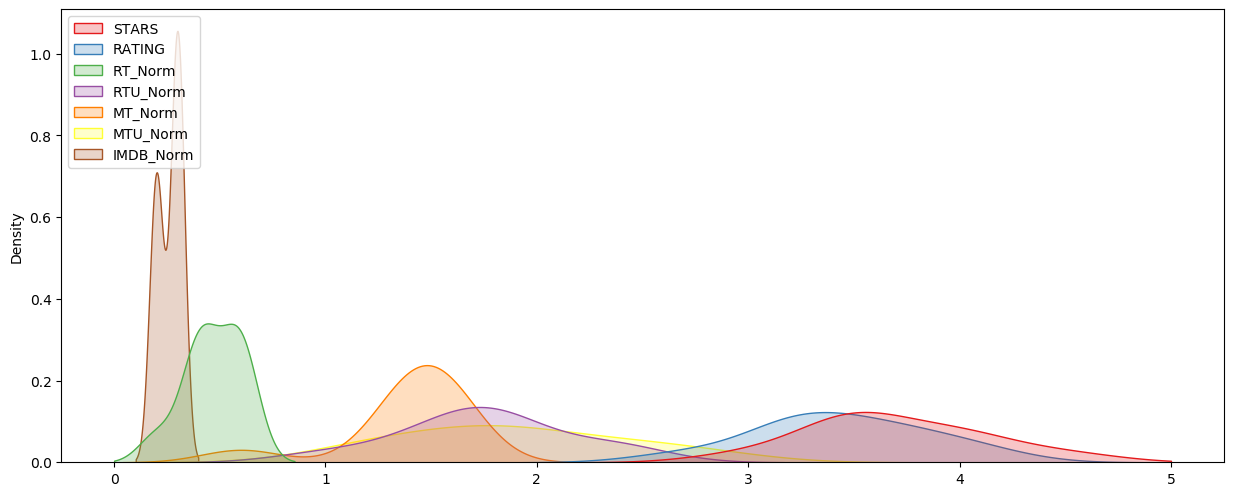

In [80]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=100)
sns.kdeplot(data=worst_files, clip=[0,5], shade=True, palette='Set1')
move_legend(ax, 'upper left')

#### Final thoughts: Wow! Fandango is showing around 3-4 star rating for films that are clearly bad! Notice the biggest offender, Taken 3!.
####  Fandango is displaying 4.5 star on their site for a film with an average rating of 1.86 across the other platforms!

In [86]:
worst_files.iloc[1]

FILM         Taken 3 (2015)
STARS                   4.5
RATING                  4.1
RT_Norm                 0.4
RTU_Norm                2.3
MT_Norm                 1.3
MTU_Norm                2.3
IMDB_Norm               0.3
Name: 25, dtype: object